### Import Libraries and Modules

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)
sys.path.insert(0, parent_path) # Add parent path to system path (for importing modules)

import utils.portfolio_management_functions as pm

### Check Excel file

In [2]:
# Check data in the file (sheets, columns, data):
try:
    pm.read_excel_default("data/multi_asset_etf_data.xlsx", print_sheets = True)
except FileNotFoundError as e:
    print(f'{e}.\nCheck file in {parent_path}')
    


Sheet name: descriptions
Columns: ticker, shortName, quoteType, currency, volume, totalAssets, longBusinessSummary
  ticker                        shortName quoteType currency    volume   totalAssets                                longBusinessSummary
0    SPY                     SPDR S&P 500       ETF      USD  48833086  566341992448  The Trust seeks to achieve its investment obje...
1    EFA            iShares MSCI EAFE ETF       ETF      USD  11332778   57923706880  The fund generally will invest at least 80% of...
2    EEM  iShares MSCI Emerging Index Fun       ETF      USD  23583292   17685696512  The fund generally will invest at least 80% of...
----------------------------------------------------------------------


Sheet name: prices
Columns: Date, BWX, DBC, EEM, EFA, HYG, IEF, IYR, PSP, QAI, SHV, SPY, TIP
        Date     BWX     DBC     EEM     EFA     HYG     IEF     IYR     PSP     QAI     SHV      SPY     TIP
0 2011-01-31 24.7125 26.2632 34.4134 39.6880 43.0005 71.4978 36.4

### Import Data and perform high level check

In [3]:
# Import data from the file:
prices = pm.read_excel_default("data/multi_asset_etf_data.xlsx", sheet_name="prices", index_col=0, )
excess_returns = pm.read_excel_default("data/multi_asset_etf_data.xlsx", sheet_name="excess returns", index_col=0)
total_returns = pm.read_excel_default("data/multi_asset_etf_data.xlsx", sheet_name="total returns", index_col=0)

risk_free_rate = total_returns.loc[:,['SHV']]
total_returns = total_returns.drop('SHV', axis = 1)

# Check for potential outliers and nan values:
print(excess_returns.describe())
print()
print(excess_returns.isna().sum())

           BWX      DBC      EEM      EFA      HYG      IEF      IYR      PSP      QAI      SPY      TIP
count 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000
mean   -0.0010  -0.0008   0.0022   0.0046   0.0031   0.0012   0.0065   0.0077   0.0012   0.0106   0.0014
std     0.0236   0.0486   0.0519   0.0439   0.0223   0.0182   0.0490   0.0621   0.0141   0.0413   0.0148
min    -0.0694  -0.1776  -0.1791  -0.1452  -0.1044  -0.0476  -0.2005  -0.2789  -0.0605  -0.1290  -0.0676
25%    -0.0135  -0.0311  -0.0304  -0.0227  -0.0066  -0.0099  -0.0239  -0.0234  -0.0074  -0.0132  -0.0071
50%     0.0015  -0.0012   0.0036   0.0080   0.0040  -0.0003   0.0101   0.0144   0.0020   0.0147   0.0028
75%     0.0133   0.0356   0.0320   0.0319   0.0135   0.0114   0.0368   0.0441   0.0089   0.0356   0.0097
max     0.0780   0.1022   0.1628   0.1429   0.0850   0.0461   0.1320   0.1784   0.0364   0.1268   0.0422

BWX    0
DBC    0
EEM    0
EFA    0
HYG    0
IEF    0


***

### Get returns summary statistics.
- Available columns:
    
    'Mean',
    'Annualized Mean',
    'Vol',
    'Annualized Vol',
    'Sharpe',
    'Annualized Sharpe',
    'Min',
    'Max',
    'Skewness',
    'Excess Kurtosis',
    'Historical VaR (var_quantile)',
    'Annualized Historical VaR (var_quantile)',
    'Historical CVaR (var_quantile)',
    'Annualized Historical CVaR (var_quantile)',
    'Cumulative Return',
    'Max Drawdown',
    'Peak Date',
    'Bottom Date',
    'Recovery',
    'Duration (days)',
    'Tangency Weights' 

In [4]:
#Calculate statistics:
return_statistics = pm.calc_returns_statistics(
    returns = excess_returns,
    annual_factor=12,
    rf = risk_free_rate,
    provided_excess_returns=False,
    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe']
)
return_statistics

Summary Statistics:
       Mean  Annualized Mean    Vol  Annualized Vol  Sharpe  Annualized Sharpe     Min    Max
BWX -0.0010          -0.0119 0.0236          0.0817 -0.0826            -0.2861 -0.0694 0.0780
DBC -0.0008          -0.0091 0.0486          0.1685 -0.0352            -0.1221 -0.1776 0.1022
EEM  0.0022           0.0270 0.0519          0.1799  0.0248             0.0860 -0.1791 0.1628
EFA  0.0046           0.0550 0.0439          0.1522  0.0826             0.2862 -0.1452 0.1429
HYG  0.0031           0.0374 0.0223          0.0773  0.0966             0.3348 -0.1044 0.0850
IEF  0.0012           0.0139 0.0182          0.0632  0.0112             0.0389 -0.0476 0.0461
IYR  0.0065           0.0779 0.0490          0.1696  0.1131             0.3917 -0.2005 0.1320
PSP  0.0077           0.0929 0.0621          0.2152  0.1091             0.3781 -0.2789 0.1784
QAI  0.0012           0.0150 0.0141          0.0490  0.0205             0.0710 -0.0605 0.0364
SPY  0.0106           0.1270 0.0413     

,Annualized Mean,Annualized Vol,Annualized Sharpe
BWX,-0.0119,0.0817,-0.2861
DBC,-0.0091,0.1685,-0.1221
EEM,0.0270,0.1799,0.0860
EFA,0.0550,0.1522,0.2862
HYG,0.0374,0.0773,0.3348
IEF,0.0139,0.0632,0.0389
IYR,0.0779,0.1696,0.3917
PSP,0.0929,0.2152,0.3781
QAI,0.0150,0.0490,0.0710
SPY,0.1270,0.1431,0.8073


In [5]:
def get_best_worse_sharpe(
        summary_statistics: pd.DataFrame,
        stat: str = 'Annualized Sharpe'):
    """
    Get the best and worst Sharpe ratio from a DataFrame of Sharpe ratios.

    Parameters:
    summary_statistics (pd.DataFrame): DataFrame containing summary statistics.
    stat (str, default='Annualized Sharpe'): The statistic to compare assets by.

    Returns:
    pd.DtaFrame: Best and worst Sharpe ratios.
    """

    best_worse_sharpe = summary_statistics.copy().sort_values("Annualized Sharpe", ascending=False)
    best_worse_sharpe = best_worse_sharpe.iloc[[0, -1]]
    best_worse_sharpe = best_worse_sharpe.assign(Label=["Best Sharpe", "Worst Sharpe"])
    best_worse_sharpe = best_worse_sharpe[['Annualized Sharpe', 'Label']]
    best_worse_sharpe
    return best_worse_sharpe

In [6]:
get_best_worse_sharpe(return_statistics)

,Annualized Sharpe,Label
SPY,0.8073,Best Sharpe
BWX,-0.2861,Worst Sharpe


In [5]:
# Get best and worst sharpe ratios:
best_worse_sharpe = return_statistics.copy().sort_values("Annualized Sharpe", ascending=False)
best_worse_sharpe = best_worse_sharpe.iloc[[0, -1]]
best_worse_sharpe = best_worse_sharpe.assign(Label=["Best Sharpe", "Worst Sharpe"])
best_worse_sharpe = best_worse_sharpe[['Annualized Sharpe', 'Label']]
best_worse_sharpe

,Annualized Sharpe,Label
SPY,0.8073,Best Sharpe
BWX,-0.2861,Worst Sharpe


***

### Correlation Matrix (heatplot)

- Also show highest and lowest correlation pair.

In [6]:
excess_returns

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
date,,,,,,,,,,,
2011-02-28,0.0065,0.0416,-0.0005,0.0354,0.0143,-0.0022,0.0451,0.0401,0.0025,0.0346,0.0071
2011-03-31,0.0083,0.0264,0.0627,-0.0241,0.0003,-0.0017,-0.0111,0.0165,0.0053,-0.0001,0.0117
2011-04-30,0.0483,0.0450,0.0268,0.0557,0.0154,0.0179,0.0461,0.0581,0.0185,0.0284,0.0232
2011-05-31,-0.0134,-0.0516,-0.0293,-0.0220,0.0014,0.0252,0.0102,-0.0415,0.0001,-0.0111,0.0028
2011-06-30,-0.0003,-0.0428,-0.0095,-0.0123,-0.0059,-0.0052,-0.0312,-0.0428,-0.0109,-0.0170,0.0074
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,0.0096,-0.0076,0.0149,0.0460,0.0118,0.0134,0.0447,0.0345,0.0089,0.0460,0.0132
2024-06-30,-0.0137,-0.0059,0.0220,-0.0225,0.0006,0.0080,0.0146,-0.0213,-0.0010,0.0311,0.0034
2024-07-31,0.0339,-0.0326,0.0039,0.0213,0.0189,0.0244,0.0716,0.0640,0.0067,0.0075,0.0127


The highest correlation (0.9106) is between EFA and PSP
The lowest correlation (-0.3005) is between IEF and DBC


<Axes: >

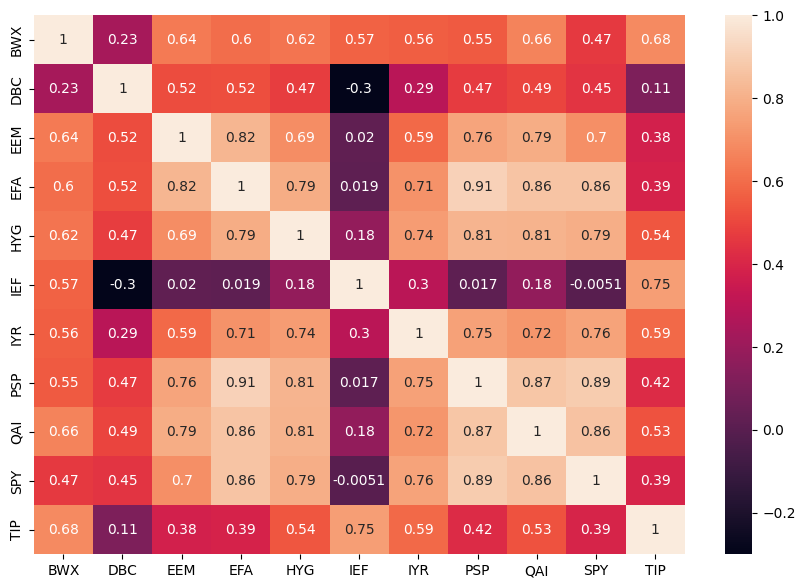

In [7]:
pm.calc_correlations(excess_returns, print_highest_lowest=True)

***

### Calculate Accumulated Returns

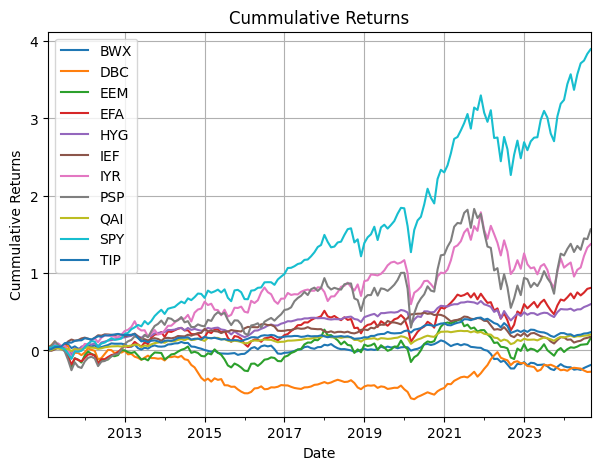

In [8]:
pm.calc_cummulative_returns(excess_returns, return_plot=True)

In [9]:
performance_statistics = pm.calc_returns_statistics(
                excess_returns[['TIP', 'BWX', 'IEF']],
                annual_factor=12,
                provided_excess_returns=True,
                keep_columns=[
                    "Annualized Mean", "Annualized Vol", "Annualized Sharpe",
                    "Accumulated Return","Max Drawdown", "Peak Date", "Bottom Date", 
                    "Annualized Historical VaR", "Kurtosis", "Skewness",
                    "Correlation"
                ]).sort_values(by="Accumulated Return", ascending=False)


performance_statistics['Peak Date'] = pd.to_datetime(performance_statistics['Peak Date']).dt.strftime('%Y-%m-%d')
performance_statistics['Bottom Date'] = pd.to_datetime(performance_statistics['Bottom Date']).dt.strftime('%Y-%m-%d')

display(performance_statistics.T)


,TIP,IEF,BWX
Annualized Mean,0.0168,0.0139,-0.0119
Annualized Vol,0.0513,0.0632,0.0817
Annualized Sharpe,0.3286,0.2206,-0.1456
Skewness,-0.6771,-0.0296,-0.1848
Excess Kurtosis,2.7363,0.0983,0.7144
Annualized Historical VaR (5.0%),-0.0742,-0.1043,-0.1500
Accumulated Return,0.2363,0.1774,-0.1879
Max Drawdown,-0.1761,-0.2675,-0.3395
Peak Date,2021-12-31,2020-07-31,2020-12-31
Bottom Date,2023-10-31,2023-10-31,2023-10-31


***

### Tangency Portfolio
- Here we consider that a risk-free asset is available, so every ~MV portfolio is the combination between the risky portfolio with maximum Sharpe Ratio (the tangency portfolio) and the risk-free-rate.
- To facilitate, we model the tangency portfolio using excess return, and so any portfolio will be among the line connecting the tangency portfolio and the origin (return of the risk-free rate in excess of the risk-free rate = 0)

,Annualized Sharpe,Tangency Weights
SPY,0.8876,-4.9041
HYG,0.4833,-0.8326
IYR,0.4594,0.8771
PSP,0.4314,0.2770
EFA,0.3616,0.5307
TIP,0.3286,0.5104
QAI,0.3052,7.2206
IEF,0.2206,-4.6825
EEM,0.1498,-0.6157
DBC,-0.0539,-0.1112


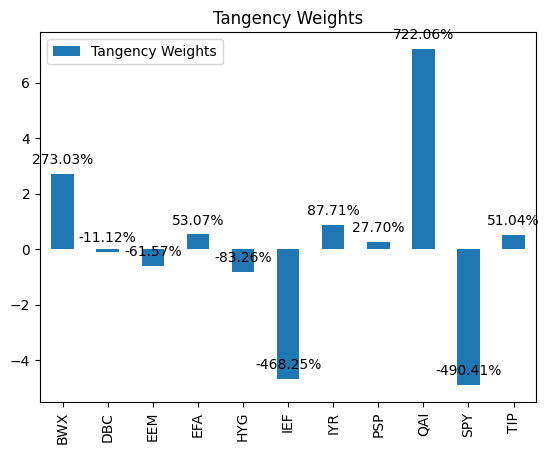

In [10]:
# Compare the sharpe ratio with the weights of the tangency portfolio:
analysis_sharpe_vs_tangent_weights = (
    pm.calc_returns_statistics(
        excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Tangency Weights', 'Annualized Sharpe']
    )
    .sort_values('Annualized Sharpe', ascending=False)
)
display(analysis_sharpe_vs_tangent_weights)

# Calculate the weights of the tangency portfolio and display results:
portfolio_tangency_ret = pm.calc_tangency_port(excess_returns,
                                               show_graphic=True,
                                               return_port_returns = True)

In [11]:
# Calculate statistics for tangency portfolio:
pm.calc_returns_statistics(
    portfolio_tangency_ret, 
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=['Annualized Sharpe', 'Annualized Mean', 'Annualized Vol'])

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,-0.5273,0.3285,-1.6050


In [12]:
#Comparing different tangency portfolios
TIP_ADJUSTMENT = 0.0012

# Modified TIPS
excess_returns_modified_tips = (excess_returns.assign(TIP=lambda df: df.TIP + TIP_ADJUSTMENT))

# No TIPS
excess_returns_no_tips = excess_returns.drop("TIP", axis=1)

# Compare weights of different tangency portfolios
pd.concat([
    pm.calc_tangency_port(excess_returns_no_tips, name="No TIPS Tangency"),
    pm.calc_tangency_port(excess_returns_modified_tips, name="Mod TIPS Tangency"),
    pm.calc_tangency_port(excess_returns)
], axis=1)

,No TIPS Tangency Weights,Mod TIPS Tangency Weights,Tangency Weights
BWX,3.0159,29.2601,2.7303
DBC,-0.0910,1.7716,-0.1112
EEM,-0.6642,-5.1230,-0.6157
EFA,0.5406,1.4514,0.5307
HYG,-0.8716,-4.4601,-0.8326
IEF,-4.8324,-18.6046,-4.6825
IYR,0.9902,11.3761,0.8771
PSP,0.3249,4.7252,0.2770
QAI,7.9769,77.4621,7.2206
SPY,-5.3893,-49.9636,-4.9041


In [13]:
#
analysis_tips_portfolios = pd.concat([
    pm.calc_tangency_port(excess_returns_no_tips, name="Mod TIPS Tangency", return_port_returns=True),
    pm.calc_tangency_port(excess_returns_modified_tips, name="No TIPS Tangency", return_port_returns=True),
    portfolio_tangency_ret
], axis=1)

pm.calc_returns_statistics(
    analysis_tips_portfolios,
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"])

,Annualized Mean,Annualized Vol,Annualized Sharpe
Mod TIPS Tangency Portfolio,-0.5808,0.3621,-1.6039
No TIPS Tangency Portfolio,-6.1740,3.6558,-1.6888
Tangency Portfolio,-0.5273,0.3285,-1.6050


***

### Equal Weight

In [14]:
MU_MONTH_TARGET = 0.010 # Target Excess Monthly Return
portfolio_equal_weights_ret = pm.calc_equal_weights_port(excess_returns,
                                                     return_port_returns=True,
                                                     target_return=MU_MONTH_TARGET*12,
                                                     annual_factor=12,
                                                     name="Equal Weights")

### Risk Parity (Simple)

In [16]:
portfolio_risk_parity_ret = pm.calc_risk_parity_port(excess_returns,
                                                    return_port_returns=True,
                                                    optimized=False,
                                                    target_return=MU_MONTH_TARGET*12,
                                                    annual_factor=12,
                                                    name="Equal Weights")

### Risk Parity (Optimized)

In [17]:
portfolio_risk_parity_ret = pm.calc_risk_parity_port(excess_returns,
                                                        return_port_returns=True,
                                                        optimized=True,
                                                        target_return=MU_MONTH_TARGET*12,
                                                        annual_factor=12)

### Tangency

### Tangency (Regularized)


In [18]:
portfolio_tangency_ret = pm.calc_tangency_port(excess_returns,
                                                return_port_returns=True,
                                                target_return=MU_MONTH_TARGET*12,
                                                annual_factor=12)

In [19]:
portfolio_regularized_ret = pm.calc_tangency_port(excess_returns,
                                                    return_port_returns=True,
                                                    cov_matrix_factor = 0.5,
                                                    target_return=MU_MONTH_TARGET*12,
                                                    annual_factor=12)

In [20]:
portfolios = pd.concat([
    portfolio_equal_weights_ret,
    portfolio_risk_parity_ret,
    portfolio_regularized_ret,
    portfolio_tangency_ret
    ], axis=1)

pm.calc_returns_statistics(
    portfolios,
    provided_excess_returns=True,
    annual_factor=12,
    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe']
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Equal Weights Portfolio,0.1200,0.2915,0.4116
Risk Parity Portfolio (Optimized),0.1200,0.3023,0.3970
Tangency Regularized (0.50) Portfolio,0.1200,0.1026,1.1695
Tangency Portfolio,0.1200,0.0748,1.6050


The highest correlation (0.9662) is between Risk Parity Portfolio (Optimized) and Equal Weights Portfolio
The lowest correlation (0.2473) is between Risk Parity Portfolio (Optimized) and Tangency Portfolio


<Axes: >

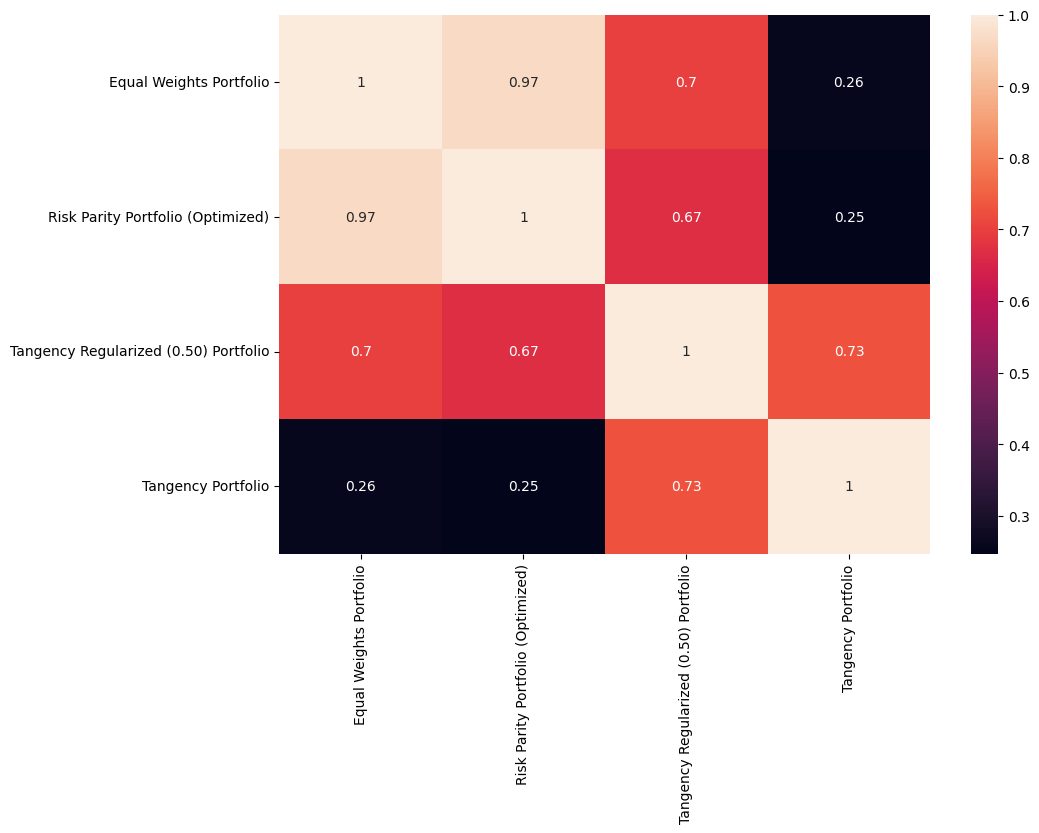

In [21]:
pm.calc_correlations(portfolios)

***

### Out-of-Sample Performance

In [22]:
# Define the sample dates and split the data:

IN_SAMPLE_END_DATE = "2022-12-31"
OUT_OF_SAMPLE_START_DATE = "2023-01-01"

in_sample_excess_returns = excess_returns.loc[:IN_SAMPLE_END_DATE]
out_of_sample_excess_returns = excess_returns.loc[OUT_OF_SAMPLE_START_DATE:]

In [23]:
in_sample_weights_tangency = pm.calc_tangency_port(in_sample_excess_returns,
                                                   target_return=MU_MONTH_TARGET*12,
                                                   annual_factor=12)

in_sample_weights_regularized = pm.calc_tangency_port(in_sample_excess_returns,
                                                     cov_matrix_factor=0.5,
                                                     target_return=MU_MONTH_TARGET*12,
                                                     annual_factor=12)

in_sample_weights_risk_parity = pm.calc_risk_parity_port(in_sample_excess_returns,
                                                            optimized=False,
                                                            target_return=MU_MONTH_TARGET*12,
                                                            annual_factor=12)

in_sample_weights_risk_parity_optim = pm.calc_risk_parity_port(in_sample_excess_returns,
                                                            optimized=True,
                                                            target_return=MU_MONTH_TARGET*12,
                                                            annual_factor=12)

in_sample_weights_equal = pm.calc_equal_weights_port(in_sample_excess_returns,
                                                        target_return=MU_MONTH_TARGET*12,
                                                        annual_factor=12)

in_sample_weights = pd.concat([
        in_sample_weights_tangency,
        in_sample_weights_equal,
        in_sample_weights_risk_parity,
        in_sample_weights_risk_parity_optim,
        in_sample_weights_regularized
        ], axis=1)

in_sample_weights


,Tangency Weights,Equal Weights,Risk Parity Weights,Risk Parity Weights (Optimized),Tangency Regularized (0.50) Weights
BWX,-0.5035,0.3096,0.6397,0.4595,-0.7612
DBC,0.0809,0.3096,0.1239,0.3137,-0.0746
EEM,0.1471,0.3096,0.1139,0.1990,-0.0774
EFA,0.0040,0.3096,0.1598,0.2204,0.0320
HYG,0.1691,0.3096,0.6024,0.4153,0.3143
IEF,1.0974,0.3096,1.0610,1.3842,0.6040
IYR,-0.1962,0.3096,0.1399,0.2132,0.1144
PSP,-0.2488,0.3096,0.0829,0.1578,0.0085
QAI,-1.8849,0.3096,1.5602,0.6372,-0.3031
SPY,1.2033,0.3096,0.1794,0.2446,0.6377


In [24]:
# Gross allocation of the portfolios:
in_sample_weights.abs().sum().to_frame("Sum of Absolute Weights")

,Sum of Absolute Weights
Tangency Weights,5.5413
Equal Weights,3.4052
Risk Parity Weights,6.1024
Risk Parity Weights (Optimized),4.9858
Tangency Regularized (0.50) Weights,3.4190


In [25]:
# In-sample performance of the portfolios:
pm.calc_returns_statistics(
        in_sample_excess_returns @ in_sample_weights,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Annualized mean', 'Annualized vol', 'Annualized sharpe']
    ).sort_values('Annualized Sharpe', ascending=False)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Weights,0.1200,0.0721,1.6634
Tangency Regularized (0.50) Weights,0.1200,0.1048,1.1447
Risk Parity Weights (Optimized),0.1200,0.3108,0.3861
Risk Parity Weights,0.1200,0.3307,0.3629
Equal Weights,0.1200,0.3322,0.3613


In [26]:
# Out-of-sample performance of the portfolios:
pm.calc_returns_statistics(
        out_of_sample_excess_returns @ in_sample_weights,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=['Annualized mean', 'Annualized vol', 'Annualized sharpe']
    ).sort_values('Annualized Sharpe', ascending=False)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Regularized (0.50) Weights,0.1511,0.0980,1.5417
Tangency Weights,0.0995,0.0996,0.9987
Equal Weights,0.2511,0.3396,0.7393
Risk Parity Weights (Optimized),0.1850,0.3915,0.4725
Risk Parity Weights,0.1934,0.4128,0.4684


***

### Tangency Portfolio (no risk-free rate available)
- If there is no risk-free rate available, then we cannot draw the CML, and thus any optimal portfolio will be a combination of the global minimum variance portfolio and the tangency portfolio

In [34]:
gmv_weights = pm.calc_gmv_port(total_returns)
tangency_weights = pm.calc_tangency_port(total_returns)

total_returns_weights = pd.concat([tangency_weights, gmv_weights], axis=1)
total_returns_weights

,Tangency Weights,GMV Weights
BWX,-1.2885,-0.1285
DBC,0.0352,-0.0060
EEM,0.1604,-0.0648
EFA,-0.1835,0.0229
HYG,0.4970,0.1122
IEF,1.8644,-0.0354
IYR,-0.4056,-0.0333
PSP,-0.2858,-0.1228
QAI,-1.3385,1.1402
SPY,1.8366,-0.1160


In [32]:
total_return_portfolios = pd.concat([
    pm.calc_gmv_port(total_returns, return_port_returns=True),
    pm.calc_tangency_port(total_returns, return_port_returns=True)
], axis=1)

pm.calc_returns_statistics(
        total_return_portfolios,
        annual_factor=12,
        keep_columns=["Mean", "Vol", "Sharpe"]
    ).rename({"Sharpe": "Mean / Vol", "Annualized Sharpe": "Annualized Mean / Vol"}, axis=1).transpose()

No risk-free rate provided. Interpret "Sharpe" as "Mean/Volatility".



,GMV Portfolio,Tangency Portfolio
Mean,0.0007,0.0185
Annualized Mean,0.0085,0.2221
Vol,0.0077,0.0393
Annualized Vol,0.0266,0.1362
Mean / Vol,0.0921,0.4710
Annualized Mean / Vol,0.3191,1.6315


In [38]:
r_v = total_return_portfolios['GMV Portfolio'].mean()
r_t = total_return_portfolios['Tangency Portfolio'].mean()
delta = (MU_MONTH_TARGET - r_v) / (r_t - r_v)
print(f"Delta: {delta:.4f}")

Delta: 0.5219


In [39]:
total_returns_weights.assign(target_return_weights=lambda df: 
                        (df["Tangency Weights"] * delta
                        + df["GMV Weights"] * (1 - delta)
                        )
                ).rename({"target_return_weights": "Target Return Weights"}, axis=1)

,Tangency Weights,GMV Weights,Target Return Weights
BWX,-1.2885,-0.1285,-0.7339
DBC,0.0352,-0.0060,0.0155
EEM,0.1604,-0.0648,0.0528
EFA,-0.1835,0.0229,-0.0848
HYG,0.4970,0.1122,0.3130
IEF,1.8644,-0.0354,0.9561
IYR,-0.4056,-0.0333,-0.2276
PSP,-0.2858,-0.1228,-0.2079
QAI,-1.3385,1.1402,-0.1535
SPY,1.8366,-0.1160,0.9031
